# Dogs vs Cat Redux

[Dogs vs. Cats Redux: Kernels Edition](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition)
    
    

In [5]:
#import modules
import utils; reload(utils) # TODO: don't know the reason for this statement
from utils import *

#In Jupyter notebooks, you will need to run this command before doing any plotting
%matplotlib inline

In [6]:
import keras

In [7]:
from vgg16 import Vgg16

# Just pop-ing the last layer and adding a Dense layer with 2 outputs

In [4]:
vgg = Vgg16()
model = vgg.model

In [5]:
model.pop()
for layer in model.layers:
    layer.trainable = False
model.add(
    keras.layers.Dense(2, activation = 'softmax')
)

In [6]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [7]:
gen = image.ImageDataGenerator()
train_batches = gen.flow_from_directory(
    directory = './data/redux/train/',
    target_size = (224, 224),
    shuffle = False,
    batch_size = 128,
    class_mode='categorical'
)
valid_batches = gen.flow_from_directory(
    directory = './data/redux/valid/',
    target_size = (224, 224),
    shuffle = False,
    batch_size = 128,
    class_mode='categorical'
)
model.compile(
    optimizer = keras.optimizers.RMSprop(lr = 0.1),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
______

In [8]:
model.fit_generator(
    generator = train_batches,
    samples_per_epoch = train_batches.n,
    nb_epoch = 3,
    validation_data = valid_batches,
    nb_val_samples = valid_batches.n,
    verbose = 2
)

Epoch 1/3
591s - loss: 8.0658 - acc: 0.4977 - val_loss: 8.0429 - val_acc: 0.5010
Epoch 2/3
589s - loss: 8.0604 - acc: 0.4999 - val_loss: 8.0429 - val_acc: 0.5010
Epoch 3/3
589s - loss: 8.0604 - acc: 0.4999 - val_loss: 8.0429 - val_acc: 0.5010


In [ ]:
# ^^ validation accuracy and loss didn't improve at all after first epoch

In [9]:
# lower training rate
gen = image.ImageDataGenerator()
train_batches = gen.flow_from_directory(
    directory = './data/redux/train/',
    target_size = (224, 224),
    shuffle = False,
    batch_size = 128,
    class_mode='categorical'
)
valid_batches = gen.flow_from_directory(
    directory = './data/redux/valid/',
    target_size = (224, 224),
    shuffle = False,
    batch_size = 128,
    class_mode='categorical'
)
vgg = Vgg16()
model = vgg.model
model.pop()
for layer in model.layers:
    layer.trainable = False
model.add(
    keras.layers.Dense(2, activation = 'softmax')
)
model.compile(
    optimizer = keras.optimizers.RMSprop(lr = 0.01),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit_generator(
    generator = train_batches,
    samples_per_epoch = train_batches.n,
    nb_epoch = 3,
    validation_data = valid_batches,
    nb_val_samples = valid_batches.n,
    verbose = 2
)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/3
591s - loss: 8.0653 - acc: 0.4980 - val_loss: 8.0429 - val_acc: 0.5010
Epoch 2/3
589s - loss: 8.0604 - acc: 0.4999 - val_loss: 8.0429 - val_acc: 0.5010
Epoch 3/3
590s - loss: 8.0604 - acc: 0.4999 - val_loss: 8.0429 - val_acc: 0.5010


In [ ]:
# validation accuracy didn't improve even now

# shuffling in train batches

In [ ]:
gen = image.ImageDataGenerator()
train_batches = gen.flow_from_directory(
    directory = './data/redux/train/',
    target_size = (224, 224),
    shuffle = True,
    batch_size = 128,
    class_mode='categorical'
)
valid_batches = gen.flow_from_directory(
    directory = './data/redux/valid/',
    target_size = (224, 224),
    shuffle = False,
    batch_size = 128,
    class_mode='categorical'
)
vgg = Vgg16()
model = vgg.model
model.pop()
for layer in model.layers:
    layer.trainable = False
model.add(
    keras.layers.Dense(2, activation = 'softmax')
)
model.compile(
    optimizer = keras.optimizers.RMSprop(lr = 0.1),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
model.fit_generator(
    generator = train_batches,
    samples_per_epoch = train_batches.n,
    nb_epoch = 3,
    validation_data = valid_batches,
    nb_val_samples = valid_batches.n,
    verbose = 2
)

In [ ]:
model.fit_generator(
    generator = train_batches,
    samples_per_epoch = train_batches.n,
    nb_epoch = 4,
    validation_data = valid_batches,
    nb_val_samples = valid_batches.n,
    verbose = 2
)

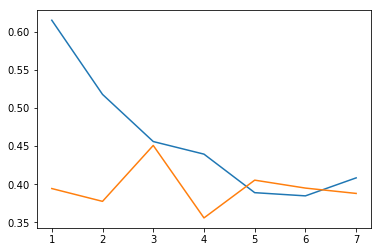

In [10]:
plt.plot(range(1, 8), [0.6149, 0.5177, 0.4559, 0.4394, 0.3889, 0.3847, 0.4083],
        range(1, 8), [0.3943, 0.3775, 0.4508, 0.3558, 0.4053, 0.3949, 0.3879])

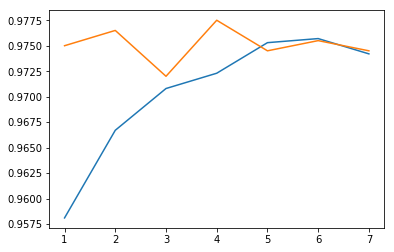

In [11]:
plt.plot(range(1, 8), [0.9581, 0.9667, 0.9708, 0.9723, 0.9753, 0.9757, 0.9742],
        range(1, 8), [0.9750, 0.9765, 0.9720, 0.9775, 0.9745, 0.9755, 0.9745])

In [ ]:
# lower training rate
gen = image.ImageDataGenerator()
train_batches = gen.flow_from_directory(
    directory = './data/redux/train/',
    target_size = (224, 224),
    shuffle = True,
    batch_size = 128,
    class_mode='categorical'
)
valid_batches = gen.flow_from_directory(
    directory = './data/redux/valid/',
    target_size = (224, 224),
    shuffle = False,
    batch_size = 128,
    class_mode='categorical'
)
vgg = Vgg16()
model = vgg.model
model.pop()
for layer in model.layers:
    layer.trainable = False
model.add(
    keras.layers.Dense(2, activation = 'softmax')
)
model.compile(
    optimizer = keras.optimizers.RMSprop(lr = 0.01),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit_generator(
    generator = train_batches,
    samples_per_epoch = train_batches.n,
    nb_epoch = 7,
    validation_data = valid_batches,
    nb_val_samples = valid_batches.n,
    verbose = 2
)

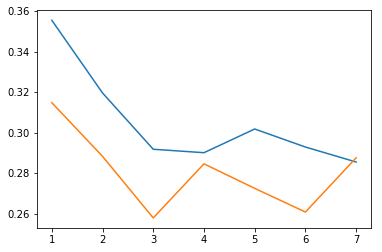

In [12]:
plt.plot(range(1, 8), [0.3555, 0.3196, 0.2918, 0.2901, 0.3018, 0.2929, 0.2855],
        range(1, 8), [0.3148, 0.2883, 0.2579, 0.2846, 0.2725, 0.2608, 0.2876])

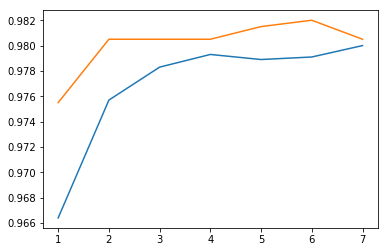

In [13]:
plt.plot(range(1, 8), [0.9664, 0.9757, 0.9783, 0.9793, 0.9789, 0.9791, 0.9800],
        range(1, 8), [0.9755, 0.9805, 0.9805, 0.9805, 0.9815, 0.9820, 0.9805])                                                                  

# shuffling and data augmentation

In [8]:
gen1 = image.ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
       height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
       channel_shift_range=10., horizontal_flip=True)

gen2 = image.ImageDataGenerator()

train_batches = gen1.flow_from_directory(
    directory = './data/redux/train/',
    target_size = (224, 224),
    shuffle = True,
    batch_size = 128,
    class_mode='categorical'
)

valid_batches = gen2.flow_from_directory(
    directory = './data/redux/valid/',
    target_size = (224, 224),
    shuffle = False,
    batch_size = 128,
    class_mode='categorical'
)
vgg = Vgg16()
model = vgg.model
model.pop()
for layer in model.layers:
    layer.trainable = False
model.add(
    keras.layers.Dense(2, activation = 'softmax')
)
model.compile(
    optimizer = keras.optimizers.RMSprop(lr = 0.01),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [9]:
model.fit_generator(
    generator = train_batches,
    samples_per_epoch = train_batches.n,
    nb_epoch = 5,
    validation_data = valid_batches,
    nb_val_samples = valid_batches.n,
    verbose = 2
)

INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.4--aws-x86_64-with-debian-stretch-sid-x86_64-2.7.13-64/lock_dir/lock


Epoch 1/5
654s - loss: 0.4764 - acc: 0.9584 - val_loss: 0.3979 - val_acc: 0.9690
Epoch 2/5
651s - loss: 0.3873 - acc: 0.9699 - val_loss: 0.2423 - val_acc: 0.9825
Epoch 3/5
651s - loss: 0.3974 - acc: 0.9715 - val_loss: 0.2986 - val_acc: 0.9780
Epoch 4/5
651s - loss: 0.3886 - acc: 0.9722 - val_loss: 0.3329 - val_acc: 0.9770
Epoch 5/5
651s - loss: 0.4077 - acc: 0.9710 - val_loss: 0.2961 - val_acc: 0.9795


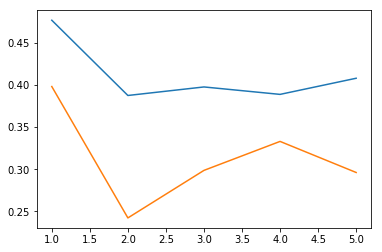

In [10]:
plt.plot(range(1,6), [0.4764, 0.3873, 0.3974, 0.3886, 0.4077],
        range(1,6), [0.3979, 0.2423, 0.2986, 0.3329, 0.2961])

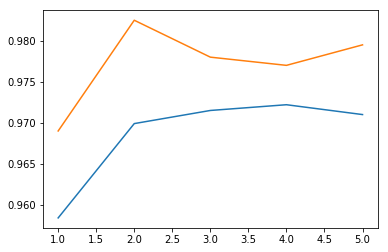

In [11]:
plt.plot(range(1,6), [0.9584,0.9699,0.9715,0.9722,0.9710],
        range(1,6), [0.9690,0.9825,0.9780,0.9770,0.9795])

# shuffling, data augmentation and batch normalization

In [ ]:
# create predictions

In [ ]:
batches, preds = vgg.test('./data/redux/test', batch_size = 128)

In [ ]:
preds

In [ ]:
filenames = batches.filenames

In [ ]:
# Grab the dog prediction column
isdog = preds[:,0]
print "Raw Predictions: " + str(isdog[:5])
print "Mid Predictions: " + str(isdog[(isdog < .6) & (isdog > .4)])
print "Edge Predictions: " + str(isdog[(isdog == 1) | (isdog == 0)])

In [ ]:
# avoiding clipping for this notebook
# isdog = isdog.clip(min=0.05, max=0.95)

In [ ]:
# Extract imageIds from the filenames in our test/unknown directory 
ids = np.array([int(f[8:f.find('.')]) for f in filenames])

In [ ]:
# joining the two columns into an array of [imageId, isDog]
subm = np.stack([ids,isdog], axis=1)
subm[:5]

In [ ]:
submission_file_name = 'submission1.csv'
np.savetxt(submission_file_name, subm, fmt='%d,%.5f', header='id,label', comments='')

In [ ]:
from IPython.display import FileLink
FileLink(submission_file_name)

In [ ]:
# training the same model for 4 more epochs
model.fit_generator(
    generator = train_batches,
    samples_per_epoch = train_batches.n,
    nb_epoch = 4,
    validation_data = valid_batches,
    nb_val_samples = valid_batches.n,
    verbose = 2
)